In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("/content/drive/MyDrive/deep-learning-challenge/Resources/charity_data.csv")

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis='columns')

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Create a list of application types to be replaced
application_types_to_replace = ['T13','T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17','T9']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Create a list of classifications to be replaced
classifications_to_replace = ['C7000','C1700','C4000',
                              'C5000','C1270',
                              'C2700','C2800','C7100',
                              'C1300','C1280','C1230',
                              'C1400','C7200','C2300',
                              'C1240','C8000','C7120',
                              'C1500','C1800','C6000',
                              'C1250','C8200','C1238',
                              'C1278','C1235','C1237',
                              'C7210','C2400','C1720',
                              'C4100','C1257','C1600',
                              'C1260','C2710','C0',
                              'C3200','C1234','C1246',
                              'C1267','C1256','C4120',
                              'C8210','C2561','C4500',
                              'C2150','C2570','C1820',
                              'C6100','C1248','C2600',
                              'C1370','C5200','C4200',
                              'C2190','C1236','C2500',
                              'C1580','C3700','C1570',
                              'C1283','C2380','C1732',
                              'C1728','C2170','C1245',
                              'C1900'
                              ]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [7]:
# Look to see if can bin `INCOME_AMT` into fewer groups to limit features
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

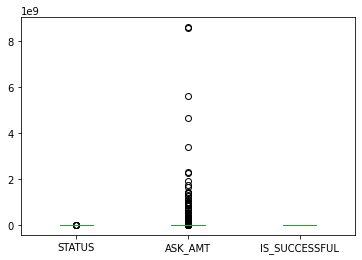

In [18]:
# Look to see if any outliers
application_df.plot.box(['ASK_AMT'])

In [22]:
# See distribution for `STATUS` and `SPECIAL_CONSIDERATIONS`
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [24]:
# Based on the above, groups wtih status 0 are outliers. Drop these rows and remove this column
application_df = application_df.drop(application_df[application_df.STATUS ==0].index)
application_df = application_df.drop(['STATUS'], axis='columns')
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT',
       'IS_SUCCESSFUL'],
      dtype='object')

In [25]:
# See distribution for `SPECIAL_CONSIDERATIONS`
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34268
Y       26
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [26]:
# Based on the above, groups wtih special considerations Y are outliers. Drop these rows and remove this column
application_df = application_df.drop(application_df[application_df.SPECIAL_CONSIDERATIONS =='Y'].index)
application_df = application_df.drop(['SPECIAL_CONSIDERATIONS'], axis='columns')
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [27]:
# Determine if Dataset is balanced.
application_df['IS_SUCCESSFUL'].value_counts()

1    18242
0    16026
Name: IS_SUCCESSFUL, dtype: int64

Based on the above, the dataset is fairly balanced.

In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [29]:
# Split our preprocessed data into our features and target arrays
# Features array
X = application_df.drop(['IS_SUCCESSFUL'], axis='columns')

# Target array
y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [30]:
X_train.shape

(25701, 40)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

## Baseline with new data cleaning

In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                3280      
                                                                 
 dense_19 (Dense)            (None, 80)                6480      
                                                                 
 dense_20 (Dense)            (None, 1)                 81        
                                                                 
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5669 - accuracy: 0.7225
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5537 - accuracy: 0.7316
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7311
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7326
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7334
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7339
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.7343
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.7354
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5445 - accuracy: 0.7351
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5434 - accura

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5706 - accuracy: 0.7237 - 492ms/epoch - 2ms/step
Loss: 0.5706112384796143, Accuracy: 0.7237072587013245


Model is overfitt and since dataset is more or less balanced will reduce epochs. Should modify hidden layers and number of nodes to try and improve accuracy

## V2 - Modify 

In [54]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 30)                1230      
                                                                 
 dense_26 (Dense)            (None, 30)                930       
                                                                 
 dense_27 (Dense)            (None, 20)                620       
                                                                 
 dense_28 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5746 - accuracy: 0.7178
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7311
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7328
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7339
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7326
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7337
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accuracy: 0.7342
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.7355
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5445 - accuracy: 0.7355
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5437 - accuracy: 0.7352

In [57]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5598 - accuracy: 0.7238 - 450ms/epoch - 2ms/step
Loss: 0.5597819089889526, Accuracy: 0.7238239645957947


The model is more balanced but accuracy is still low. Will try adding an additional hidden layer and modifying activation function

## V3 

In [58]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="elu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="elu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 30)                1230      
                                                                 
 dense_30 (Dense)            (None, 30)                930       
                                                                 
 dense_31 (Dense)            (None, 20)                620       
                                                                 
 dense_32 (Dense)            (None, 10)                210       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5758 - accuracy: 0.5308
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5547 - accuracy: 0.5308
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.5308
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.5308
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.5308
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.5308
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.5308
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.5308
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accuracy: 0.5308
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.5308

In [61]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5590 - accuracy: 0.5368 - 440ms/epoch - 2ms/step
Loss: 0.5589833855628967, Accuracy: 0.5368273854255676


Well that didn't work... Keep the layers change back the activation functions

## V4

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 80)                3280      
                                                                 
 dense_41 (Dense)            (None, 60)                4860      
                                                                 
 dense_42 (Dense)            (None, 40)                2440      
                                                                 
 dense_43 (Dense)            (None, 20)                820       
                                                                 
 dense_44 (Dense)            (None, 10)                210       
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,621
Trainable params: 11,621
Non-trai

In [66]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [67]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5649 - accuracy: 0.7232
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5533 - accuracy: 0.7309
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5511 - accuracy: 0.7325
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5489 - accuracy: 0.7319
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5476 - accuracy: 0.7346
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7337
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5463 - accuracy: 0.7353
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5453 - accuracy: 0.7345
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5448 - accuracy: 0.7354
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5446 - accuracy: 0.7352

In [68]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5616 - accuracy: 0.7256 - 474ms/epoch - 2ms/step
Loss: 0.5615904927253723, Accuracy: 0.7255748510360718


Best yet - will add Tanh activation to another hidden layer

## V5

In [76]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="gelu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 80)                3280      
                                                                 
 dense_59 (Dense)            (None, 60)                4860      
                                                                 
 dense_60 (Dense)            (None, 40)                2440      
                                                                 
 dense_61 (Dense)            (None, 20)                820       
                                                                 
 dense_62 (Dense)            (None, 10)                210       
                                                                 
 dense_63 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,621
Trainable params: 11,621
Non-tra

In [77]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5651 - accuracy: 0.7231
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5525 - accuracy: 0.7308
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.7319
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5482 - accuracy: 0.7336
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5473 - accuracy: 0.7334
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5463 - accuracy: 0.7351
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5460 - accuracy: 0.7354
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5454 - accuracy: 0.7355
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5447 - accuracy: 0.7350
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5441 - accuracy: 0.7369

In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5631 - accuracy: 0.7262 - 501ms/epoch - 2ms/step
Loss: 0.5631113052368164, Accuracy: 0.7261584997177124


## V6

In [84]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="gelu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="gelu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 80)                3280      
                                                                 
 dense_72 (Dense)            (None, 60)                4860      
                                                                 
 dense_73 (Dense)            (None, 40)                2440      
                                                                 
 dense_74 (Dense)            (None, 20)                820       
                                                                 
 dense_75 (Dense)            (None, 10)                210       
                                                                 
 dense_76 (Dense)            (None, 5)                 55        
                                                                 
 dense_77 (Dense)            (None, 1)               

In [85]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [88]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5336 - accuracy: 0.7413
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5334 - accuracy: 0.7404
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5330 - accuracy: 0.7407
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5335 - accuracy: 0.7404
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5331 - accuracy: 0.7412
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5330 - accuracy: 0.7414
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5327 - accuracy: 0.7410
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5330 - accuracy: 0.7412
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5327 - accuracy: 0.7416
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5329 - accura

In [89]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5805 - accuracy: 0.7265 - 344ms/epoch - 1ms/step
Loss: 0.580522358417511, Accuracy: 0.7265086770057678


In [ ]:
# Export our model to HDF5 file
nn.save('/content/drive/MyDrive/deep-learning-challenge/AlphabetSoupCharity.h5')